# Tasks for data visualization

   * descriptive analysis 
       * discover distribution
       * discover central tendency
       * discover dispersion
       * discover bivariate distribution via scatterplots
       * build cross-tabulations and contingency tables 

        
   * exploratory data analysis (EDA)
       * compare trends
       * locate outliers
       * browse topology
       * compare shapes  
       * explore hypotheses on data relationships 
       * explore new patterns

Sources:
* [Explore Data and Predict](https://www.kaggle.com/ikarashi/explore-data-and-predict), a notebook 'Why Employees Cause Attrition?' by [Yusuke Ikarashi](https://www.kaggle.com/ikarashi)
* [Modern Pandas (Part 6): Visualization](https://tomaugspurger.github.io/modern-6-visualization.html) 
* [Visualize Machine Learning Data in Python With Pandas](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)
* [Python data visualization: Comparing 7 tools](https://www.dataquest.io/blog/python-data-visualization-libraries/)
* [Data visualization with Seaborn](https://www.oreilly.com/learning/data-visualization-with-seaborn) by Jake VanderPlas May 7, 2015
* [Seaborn tutorial: Visualizing the distribution of a dataset](http://seaborn.pydata.org/tutorial/distributions.html)

Datasets
* Kaggle Dataset [WA_Fn-UseC_-HR-Employee-Attrition.csv](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data), data from IBM HR Analytics Employee Attrition & Performance 

In [174]:
% matplotlib inline

from altair import Chart, X, Y, Axis, SortField
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
# from IPython.display import display


In [128]:
# set up colors and styles 

sns.set_palette("Set2")

### Load data

In [2]:
def read(fp):
    """
    Notes: 
        - Fields Over18, EmployeeCount, EmployeeNumber, StandardHours - seems don't make sense, drop them
        - Fields Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime - convert to Categorical datatype
    """
    df = (pd.read_csv(fp)
            .drop(["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)
            .assign(Attrition=lambda x: pd.Categorical(x['Attrition']),
                    BusinessTravel=lambda x: pd.Categorical(x['BusinessTravel']),
                    Department=lambda x: pd.Categorical(x['Department']),
                    EducationField=lambda x: pd.Categorical(x['EducationField']),
                    Gender=lambda x: pd.Categorical(x['Gender']),
                    JobRole=lambda x: pd.Categorical(x['JobRole']),
                    MaritalStatus=lambda x: pd.Categorical(x['MaritalStatus']),
                    OverTime=lambda x: pd.Categorical(x['OverTime'])
                   ))
    return df

In [77]:
df = read("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# select only following columns
# extract_cols  = ['Age','JobLevel', 'MonthlyIncome', 
#                  'NumCompaniesWorked', 'TotalWorkingYears', 
#                  'YearsAtCompany', 'YearsInCurrentRole',
#                  'YearsSinceLastPromotion', 'Attrition']

# df = df[extract_cols].copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [78]:
# get columns numeric and categorical attributes
# details: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html 

cols = df.columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = cols.drop(num_cols.tolist())

print("Numeric data columns: \n {} \n".format(num_cols.values))
print("Categorical data columns: \n {}".format(cat_cols.values))

Numeric data columns: 
 ['Age' 'DailyRate' 'DistanceFromHome' 'Education' 'EnvironmentSatisfaction'
 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobSatisfaction' 'MonthlyIncome'
 'MonthlyRate' 'NumCompaniesWorked' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'] 

Categorical data columns: 
 ['Attrition' 'BusinessTravel' 'Department' 'EducationField' 'Gender'
 'JobRole' 'MaritalStatus' 'OverTime']


# Plotting univariate distributions

### Histograms, KDE, and Densities

* A fast way to get an idea of the distribution of each attribute

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function

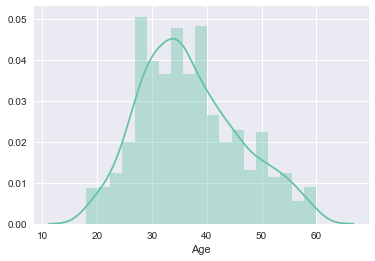

In [145]:
sns.distplot(df.Age)

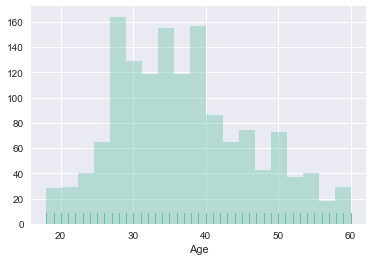

In [148]:
# add a rug plot, which draws a small vertical tick at each observation

sns.distplot(df.Age, kde=False, rug=True)

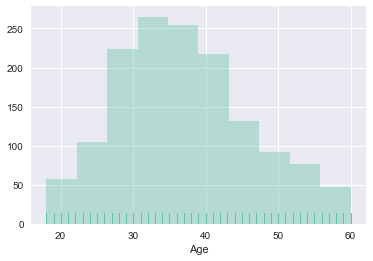

In [202]:
# select number of bins in histogram

sns.distplot(df.Age, bins=10, kde=False, rug=True)

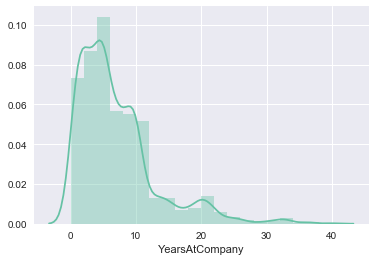

In [204]:
# make histogram using seaborn 

# plot a histogram with a kernel density estimate on top of it
sns.distplot(df['YearsAtCompany'], bins=20)

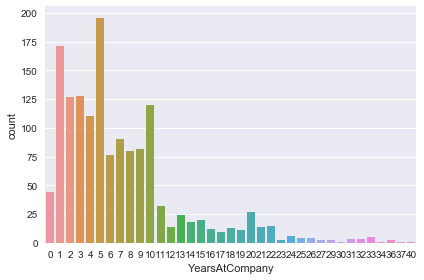

In [206]:
# Describe distribution of 'YearsAtCompany' data

sns.countplot(x='YearsAtCompany', data=df)
sns.despine()
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e666c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e98d978>]], dtype=object)

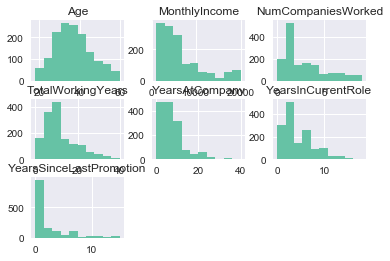

In [152]:
# Univariate Histograms for few attributes at once 

df[['Age', 'MonthlyIncome', 
   'NumCompaniesWorked', 'TotalWorkingYears', 
   'YearsAtCompany', 'YearsInCurrentRole',
   'YearsSinceLastPromotion']].hist()
#plt.show()

### Kernel density estimaton

* useful tool for plotting the shape of a distribution 

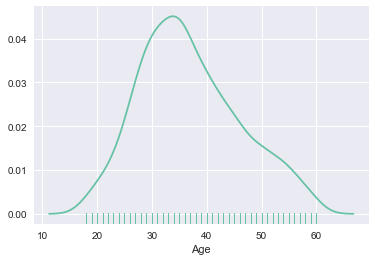

In [154]:
sns.distplot(df.Age, hist=False, rug=True);

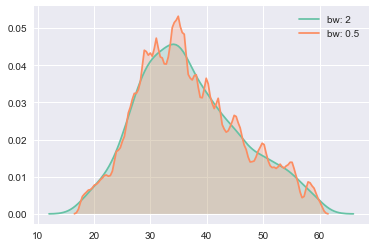

In [197]:
# We can see that if we use the kdeplot() function in seaborn, we get the same 

sns.kdeplot(df.Age, shade=True, bw=2, label="bw: 2")
sns.kdeplot(df.Age, shade=True, bw=0.5, label="bw: 0.5")

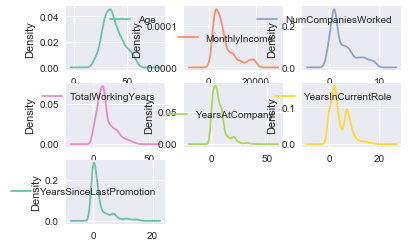

In [198]:
df[['Age', 'MonthlyIncome', 
   'NumCompaniesWorked', 'TotalWorkingYears', 
   'YearsAtCompany', 'YearsInCurrentRole',
   'YearsSinceLastPromotion']].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

### Fitting parametric distributions

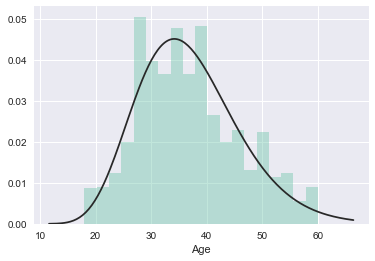

In [182]:
sns.distplot(df.Age, kde=False, fit=stats.gamma)

### Faceted Histograms
to view data is via histograms of subsets

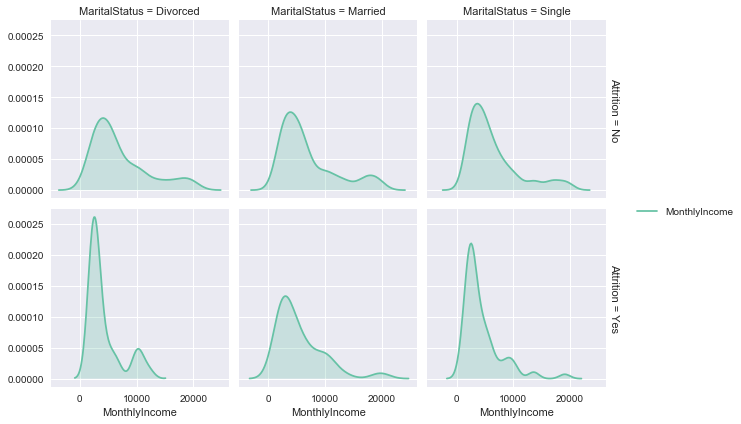

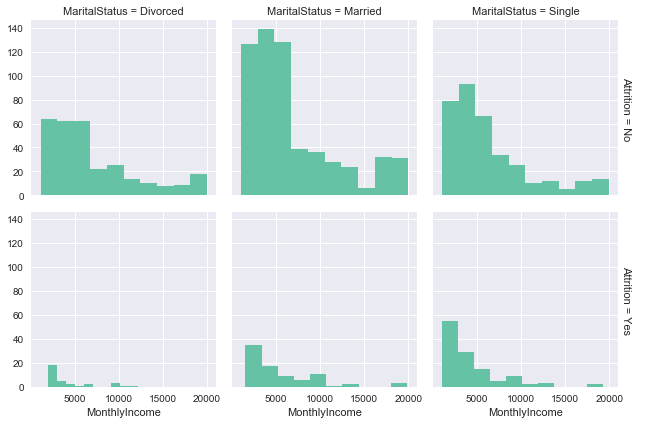

In [201]:
# # show the amount of MonthlyIncome by Attrition value 
#  ['Attrition' 'BusinessTravel' 'Department' 'EducationField' 'Gender'
#  'JobRole' 'MaritalStatus' 'OverTime']

(sns.FacetGrid(df, 
              row='Attrition', 
              col='MaritalStatus',
              margin_titles=True)
     .map(sns.kdeplot, "MonthlyIncome", shade=True)
     .add_legend()
)

(sns.FacetGrid(df, 
              row='Attrition', 
              col='MaritalStatus',
              margin_titles=True)
    .map(plt.hist, "MonthlyIncome")
    .add_legend()
)

# Plotting bivariate distributions

### Histograms for 2 distributions

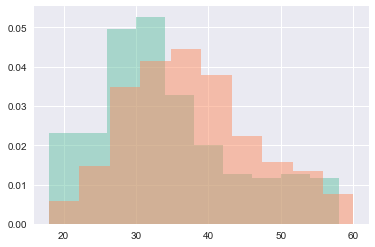

In [129]:
# plot histograms for 2 subsets of data (Attrition = ['Yes', 'No'])

data = df[['Age']]

for attr in ['Yes', 'No']:
    plt.hist(data.Age[df.Attrition == attr], normed=True, alpha=0.5)

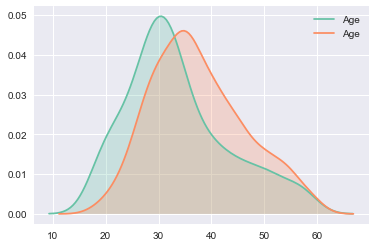

In [130]:
# Histograms and KDE can be combined using distplot 

for attr in ['Yes', 'No']:
    sns.kdeplot(data.Age[df.Attrition == attr], shade=True)

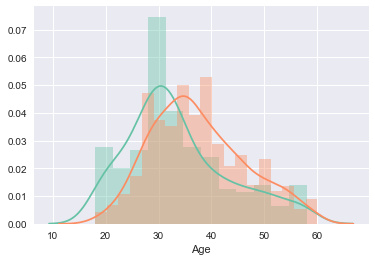

In [183]:
# Histograms and KDE can be combined using distplot 

for attr in ['Yes', 'No']:
    sns.distplot(data.Age[df.Attrition == attr])

### Scatterplots

* most familiar way to visualize a bivariate distribution

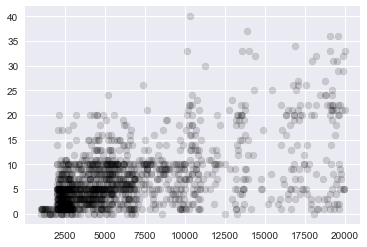

In [185]:
# matplotlib 

fig, ax = plt.subplots()

ax.scatter(x='MonthlyIncome', y='YearsAtCompany', data=df, c='k', alpha=.15);

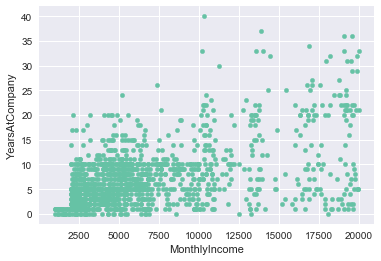

In [187]:
# pandas plotting 

df.plot(kind='scatter', x='MonthlyIncome', y='YearsAtCompany')

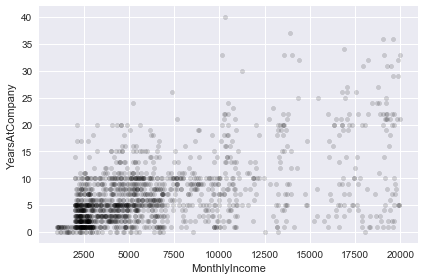

In [188]:
df.plot.scatter(x='MonthlyIncome', y='YearsAtCompany', c='k', alpha=.15)
plt.tight_layout()

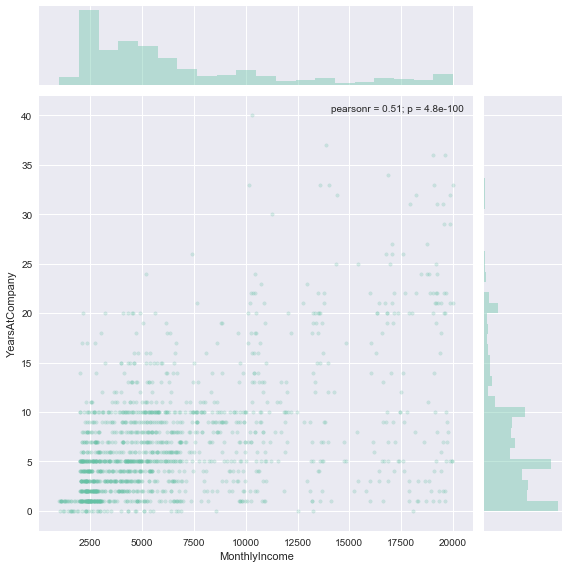

In [189]:
# seaborn 

sns.jointplot(x='MonthlyIncome', y='YearsAtCompany', data=df, size=8, alpha=.25, marker='.')
plt.tight_layout()

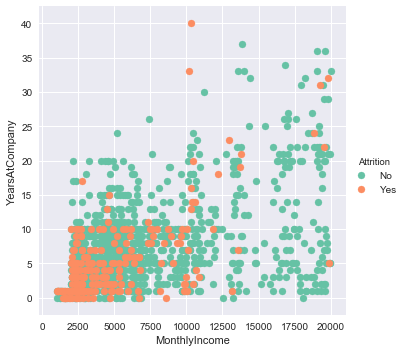

In [190]:
# One piece of information missing in the plots above is what Attrition is
# We'll use seaborn's FacetGrid to color the scatterplot by Attrition

sns.FacetGrid(df, hue="Attrition", size=5) \
   .map(plt.scatter, "MonthlyIncome", "YearsAtCompany") \
   .add_legend()

### Hexbin plots

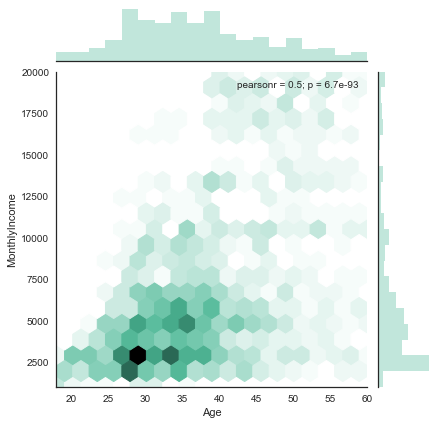

In [191]:
#  The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins

data = df[['Age', 'MonthlyIncome']]
with sns.axes_style('white'):
    sns.jointplot("Age", 'MonthlyIncome', data, kind='hex')

### Kernel density estimation

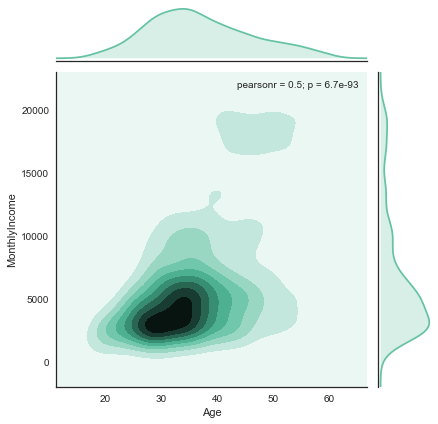

In [193]:
#a two-dimensional visualization of the data

data = df[['Age', 'MonthlyIncome']]

with sns.axes_style('white'):
    sns.jointplot("Age", 'MonthlyIncome', data, kind='kde')

In [196]:


# g = sns.jointplot(x="Age", y="MonthlyIncome", data=df, kind="kde", color="m")
# g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
# g.set_axis_labels("$X$", "$Y$");

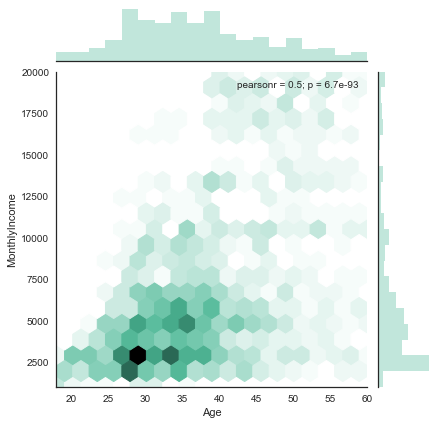

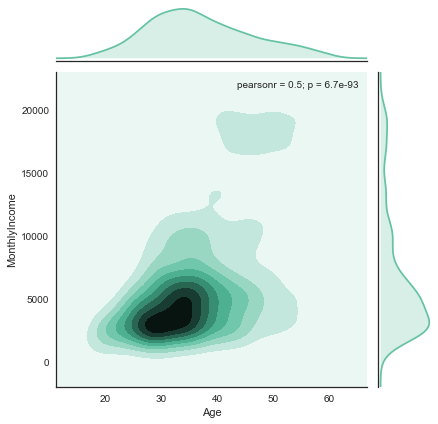

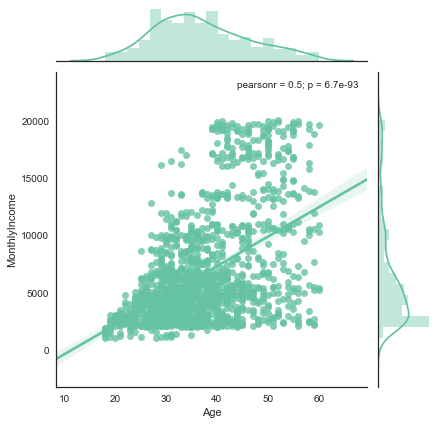

In [133]:
# We can see the joint distribution and the marginal distributions

with sns.axes_style('white'):
    sns.jointplot("Age", 'MonthlyIncome', data, kind='hex')
    sns.jointplot("Age", 'MonthlyIncome', data, kind='kde')
    sns.jointplot("Age", 'MonthlyIncome', data, kind='reg');

# Visualizing pairwise relationships in a dataset 

To plot multiple pairwise bivariate distributions in a dataset

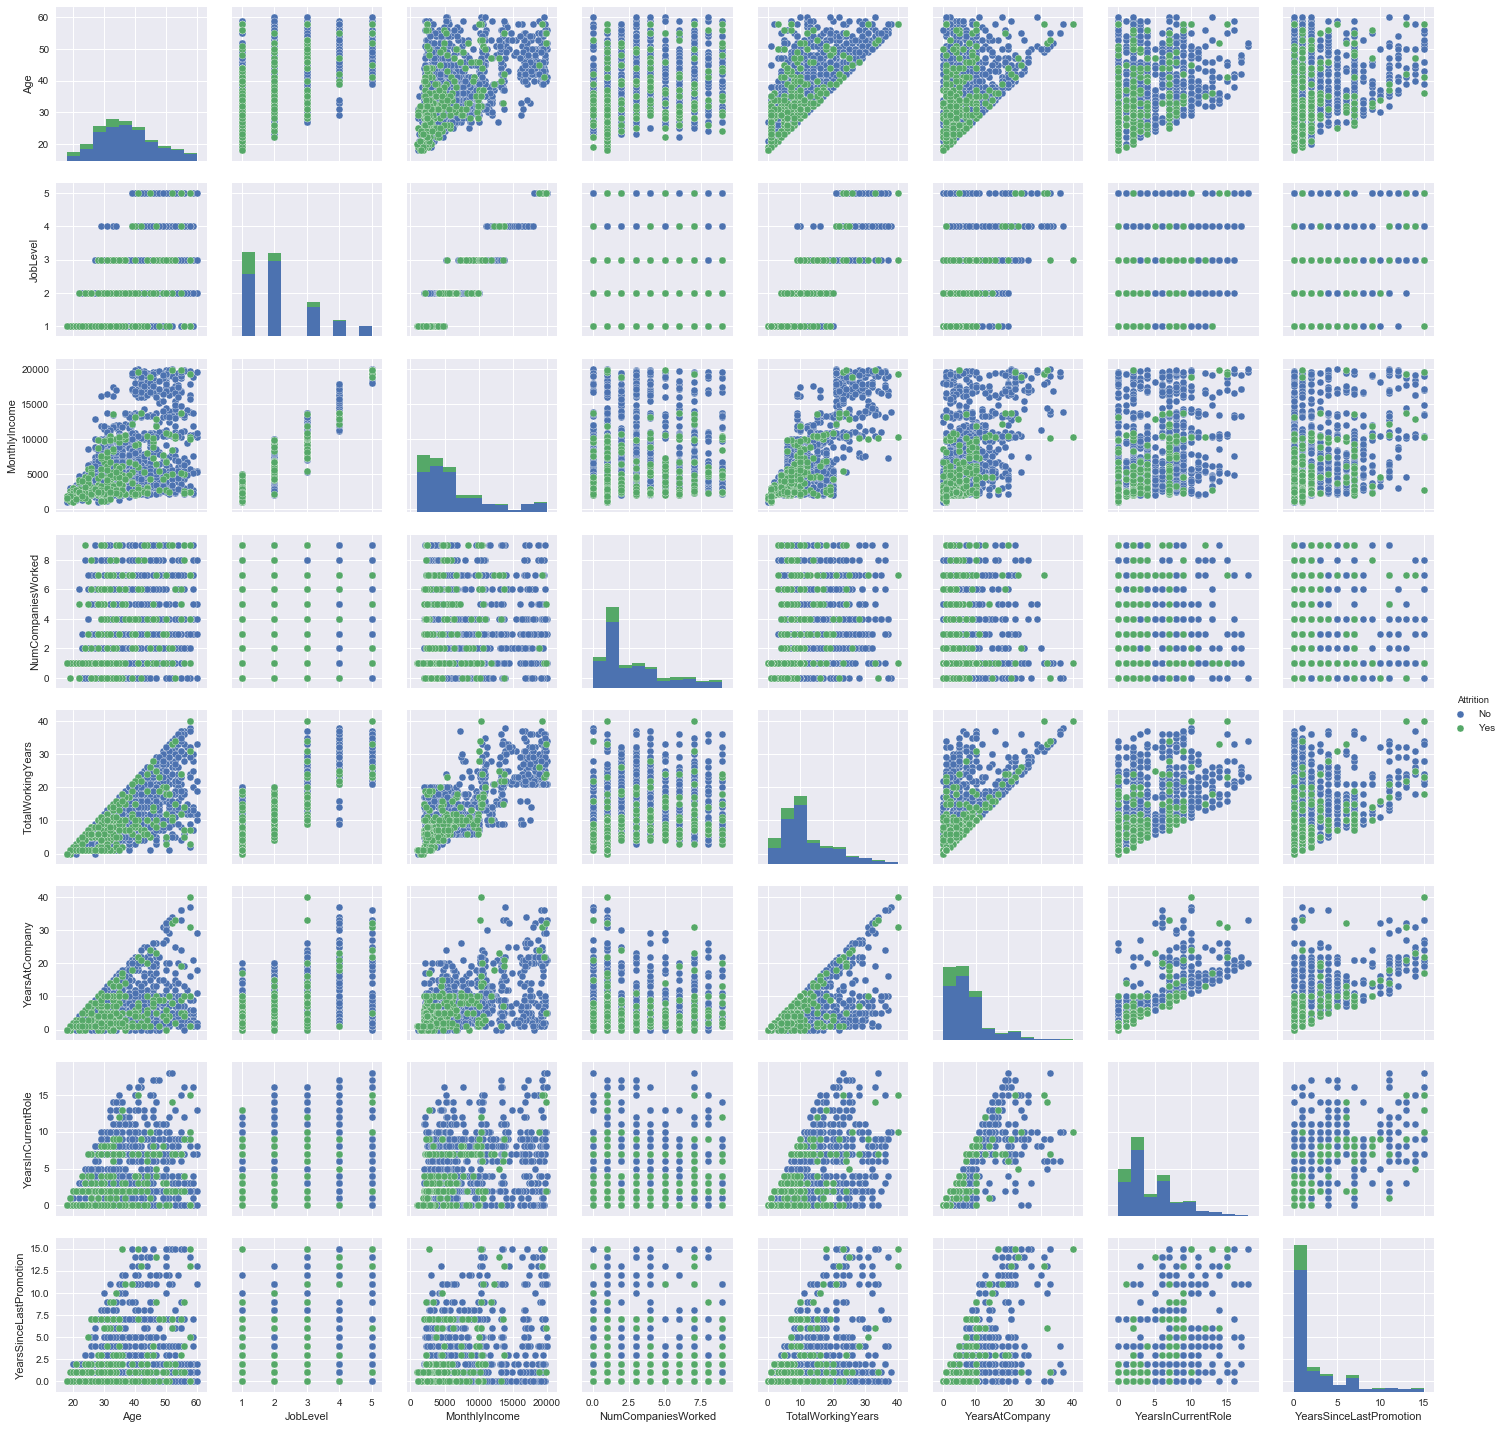

In [45]:
# Pairplot shows the bivariate relation between each pair of features

g = sns.pairplot(df, hue='Attrition')

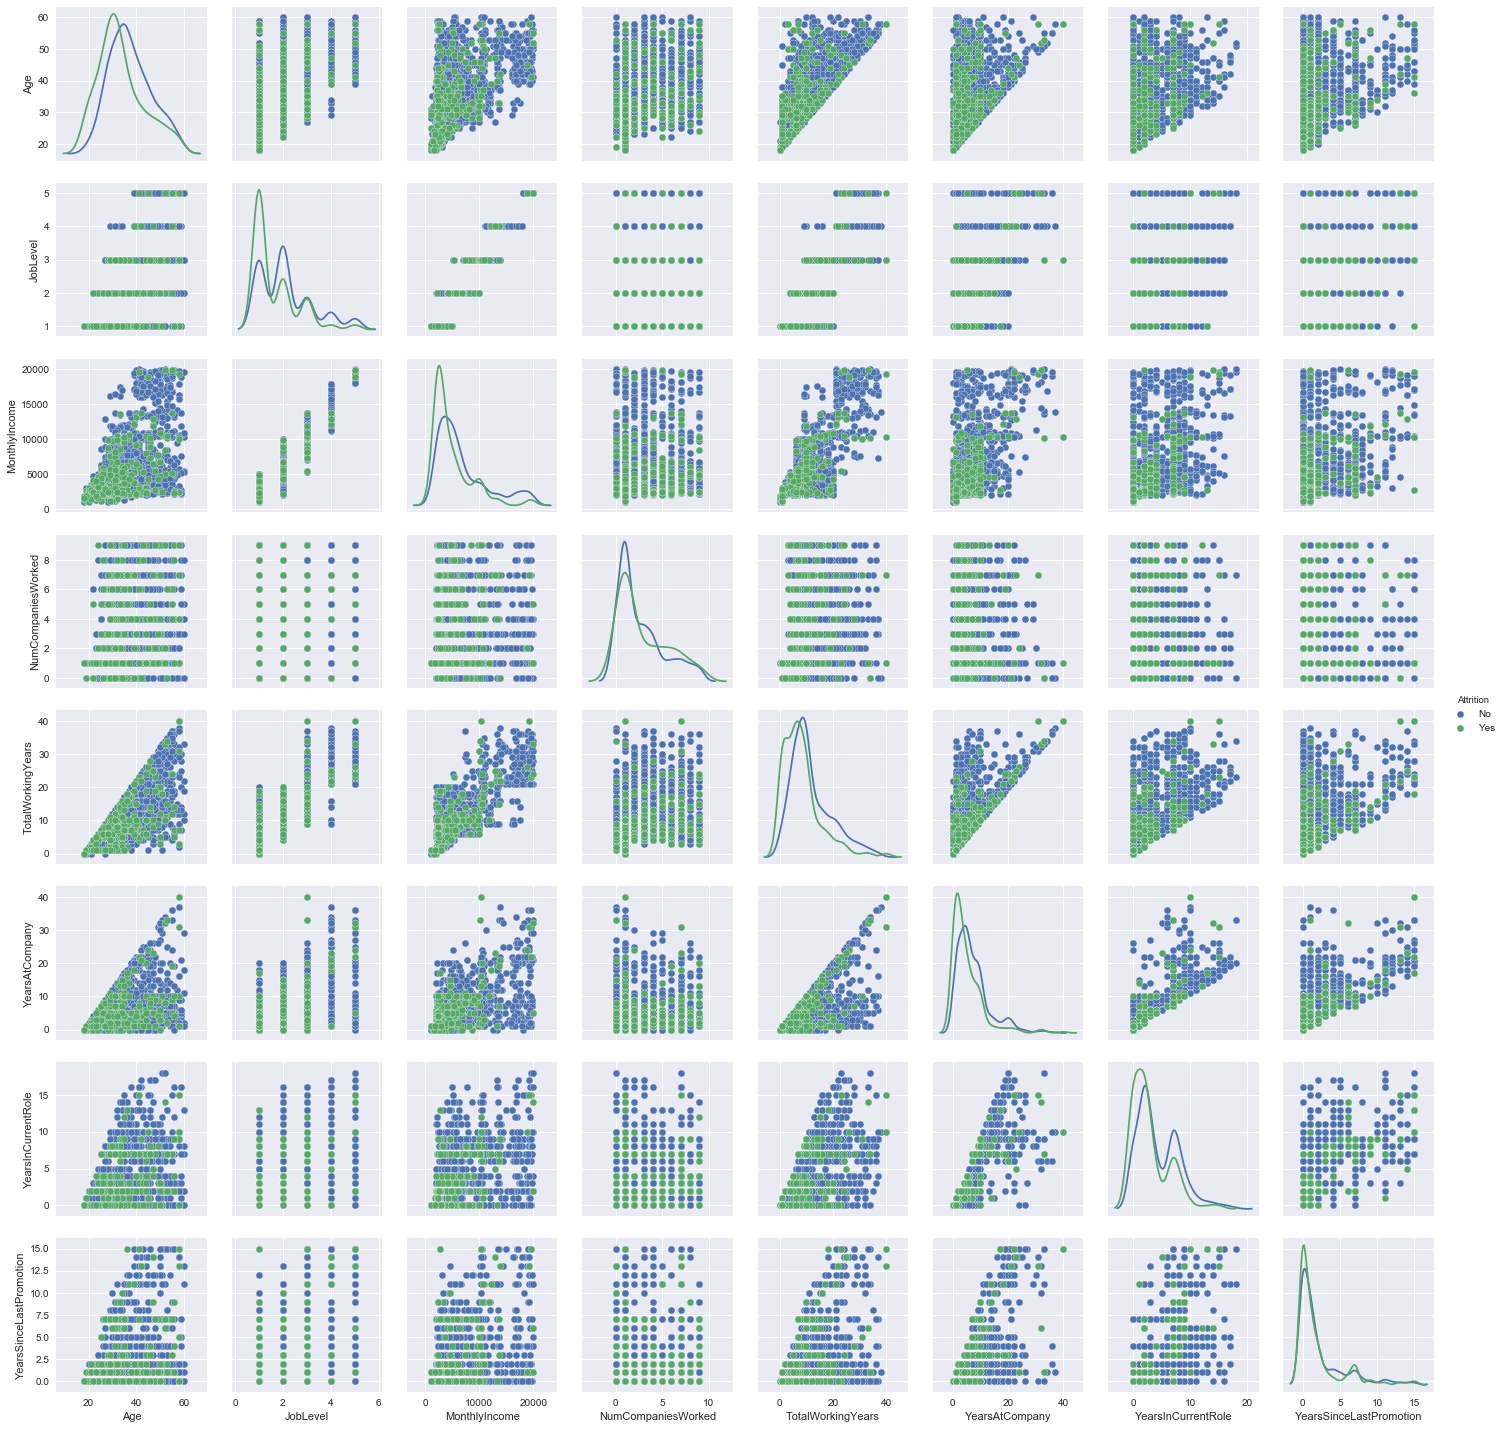

In [44]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

g = sns.pairplot(df, hue='Attrition', diag_kind="kde")

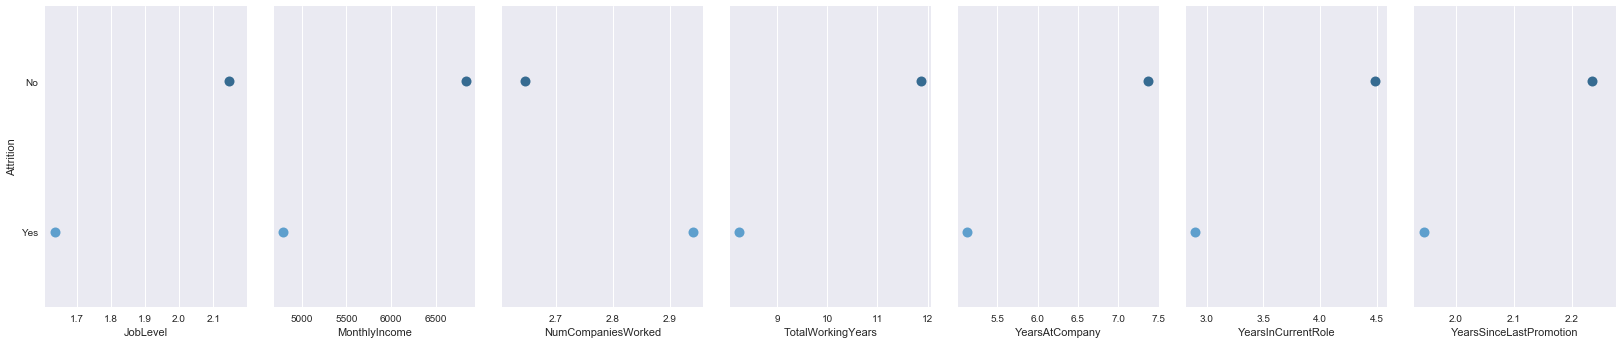

In [65]:
agged = df.groupby(['Attrition']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['Attrition'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

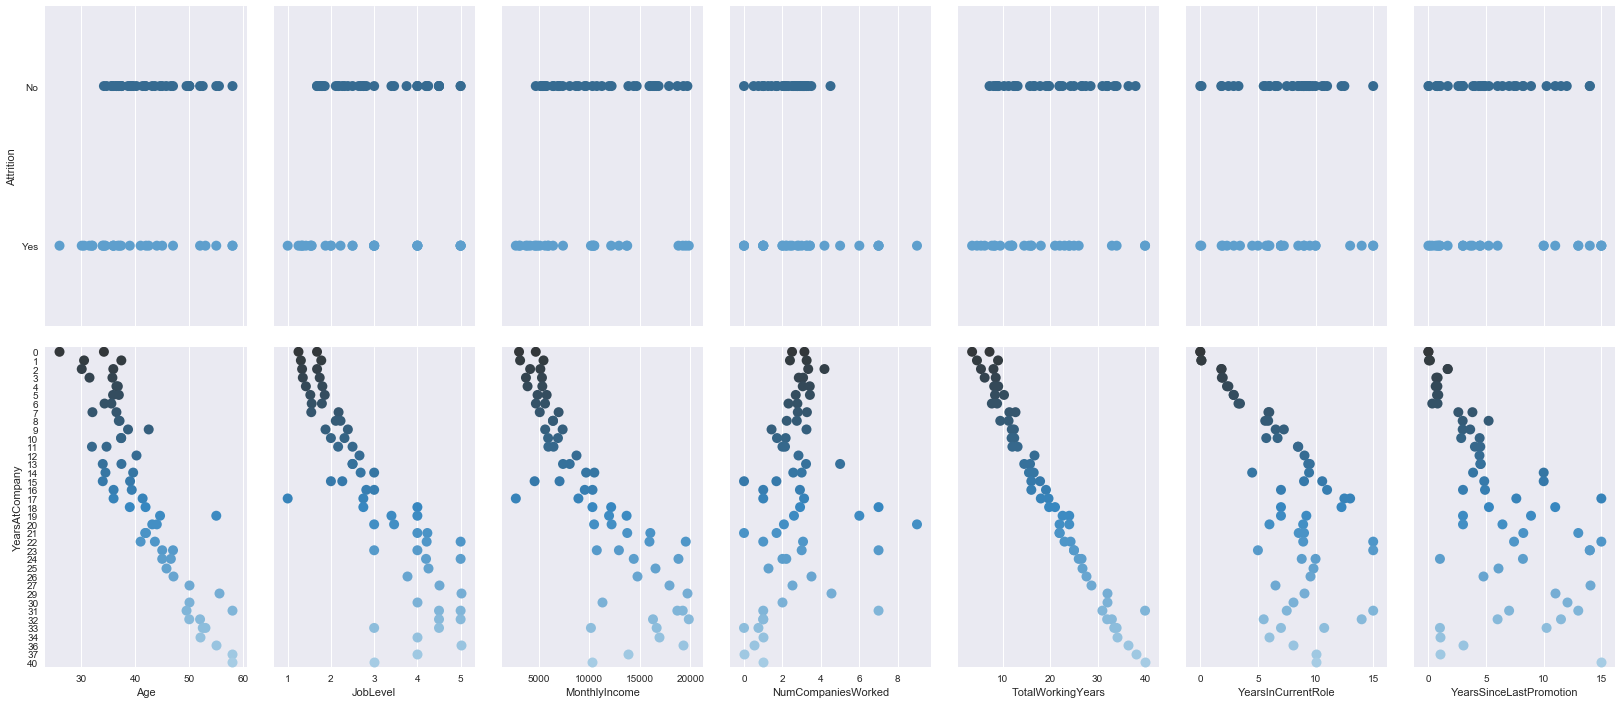

In [66]:
agged = df.groupby(['Attrition', 'YearsAtCompany']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['Attrition', 'YearsAtCompany'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

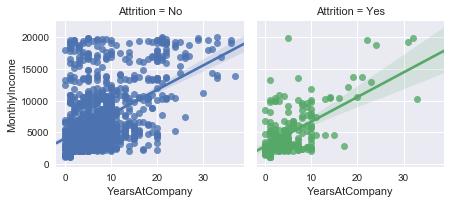

In [81]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'YearsAtCompany', 'MonthlyIncome');

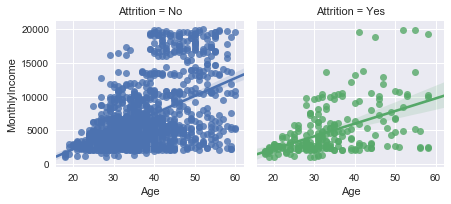

In [82]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'Age', 'MonthlyIncome');

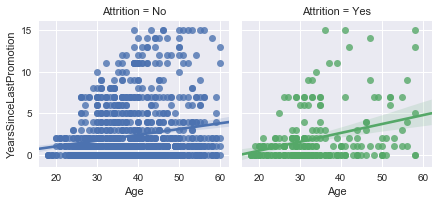

In [83]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'Age', 'YearsSinceLastPromotion');

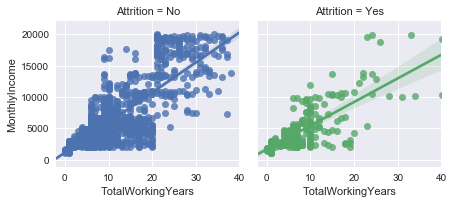

In [86]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'TotalWorkingYears', 'MonthlyIncome');

# Overview of libraries

### Plotting with Seaborn 

[An introduction to seaborn](http://seaborn.pydata.org/introduction.html#introduction)

Key features: 
* support for numpy and pandas data structures and statistical routines from scipy and statsmodels
* visualizing univariate and bivariate distributions 
* comparing between subsets of data
* fit and visualize linear regression models
* visualize matrices of data and discover structure in those matrices
* plot statistical timeseries data 
* abstractions for structuring grids of plots, easily build complex visualizations
